<a href="https://colab.research.google.com/github/muskan123-sketch/CNN-project/blob/main/Copy_of_Project_2_CiFAR_10_Images_Classification_Using_CNNs_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**PROJECT TO  CLASSIFY IMAGES (CIFAR-10) USING CONVOLUTIONAL NEURAL NETWORKS**




- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks


- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 



# STEP #1: IMPORT LIBRARIES/DATASETS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [ ]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

50000-entries,32*32 pixel zise 3 for RGB

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[5]


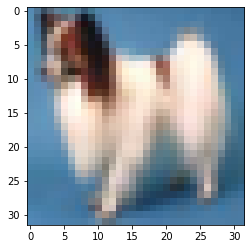

In [ ]:
i=4000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


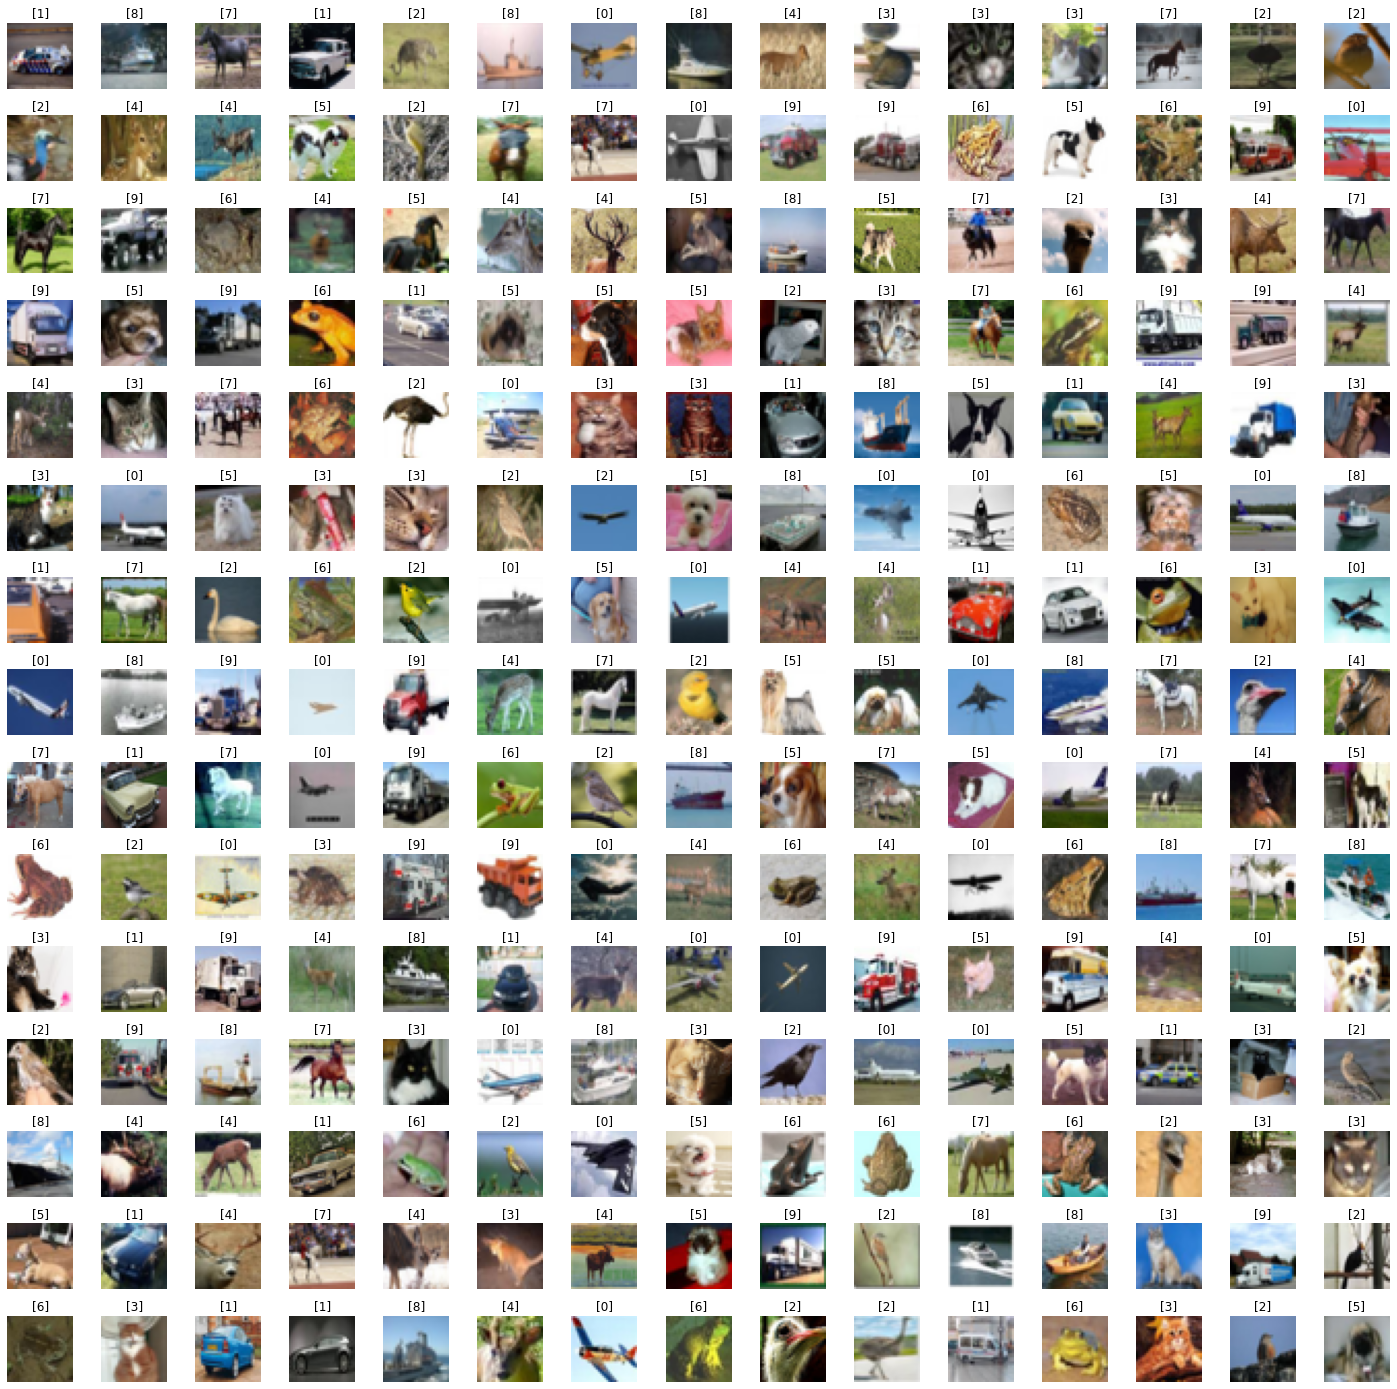

In [ ]:
W_grid=15
L_grid=15
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,L_grid*W_grid):
      index=np.random.randint(0,n_training)#pick a random number from 0 to 50000
      axes[i].imshow(X_train[index])
      axes[i].set_title(y_train[index])#will provide index to every image so that we can match with the corresponding class
      axes[i].axis('off')#we are removing the axis labels
plt.subplots_adjust (hspace=0.4)     
      #axes[i]

In [ ]:
n_training

50000

# STEP #3: DATA PREPARATION

In [ ]:
X_train = X_train.astype('float32')#later it willbe used for augmentation
X_test = X_test.astype('float32')

In [ ]:
number_cat = 10 #no of categories

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)#this will convert a single value into a binary class matrix one in the combinaion of 0s and 1s

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train#we have whole bunch of numbers so we need to normalise them and reduce the pixels 

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [ ]:
X_train=X_train/255 #we want from 0-1
X_test=X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_test #to achieve this result onlymwe converted dtype to float

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [ ]:
Input_shape=X_train.shape[1:] #we want 32,32,3 exclude 50000 from the shape

In [ ]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512,activation='relu'))#full connection
cnn_model.add(Dense(units=512,activation='relu'))#full connection
#OUTPUT LAYER
cnn_model.add(Dense(units=10,activation='softmax'))#ACTIVATION SOFTMAX BCOZ WE ARE PERFORMING CLASSIFICATION WE DUN WANT CONTINUOUS VALUES

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
#LR=LEARNING RATE

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 50, shuffle = True)#SHUFFLING WILL DO BETTER HERE,AS WE HAVE A LARGE DATA SO HERE EPOCH=1

Epoch 1/50
1563/1563 [==============================] - 186s 118ms/step - loss: 1.7944 - accuracy: 0.3393
Epoch 2/50
1563/1563 [==============================] - 182s 117ms/step - loss: 1.1725 - accuracy: 0.5874
Epoch 3/50
1563/1563 [==============================] - 184s 118ms/step - loss: 1.0123 - accuracy: 0.6490
Epoch 4/50
1563/1563 [==============================] - 183s 117ms/step - loss: 0.9868 - accuracy: 0.6639
Epoch 5/50
1563/1563 [==============================] - 185s 118ms/step - loss: 0.9412 - accuracy: 0.6846
Epoch 6/50
1563/1563 [==============================] - 184s 118ms/step - loss: 0.9256 - accuracy: 0.6872
Epoch 7/50
1563/1563 [==============================] - 183s 117ms/step - loss: 0.9094 - accuracy: 0.6942
Epoch 8/50
1563/1563 [==============================] - 183s 117ms/step - loss: 0.9001 - accuracy: 0.6977
Epoch 9/50
1563/1563 [==============================] - 182s 116ms/step - loss: 0.8903 - accuracy: 0.7031
Epoch 10/50
1563/1563 [=======================

# STEP #5: EVALUATE THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))#evaluation done on test set and also we want only evaluation not vaidation thats why passed 1nn

313/313 [==============================] - 8s 27ms/step - loss: 0.9397 - accuracy: 0.6940
Test Accuracy: 0.6940000057220459


In [ ]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8, 8, 8, ..., 5, 0, 7])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

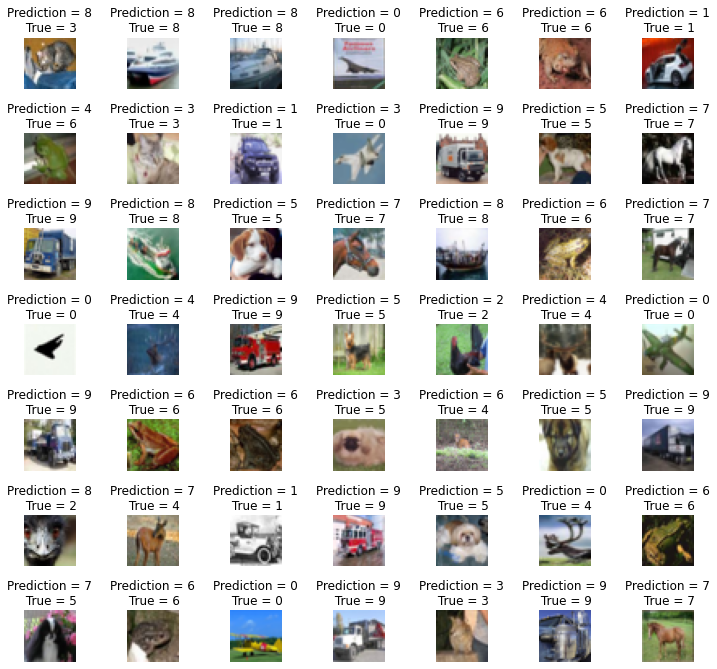

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

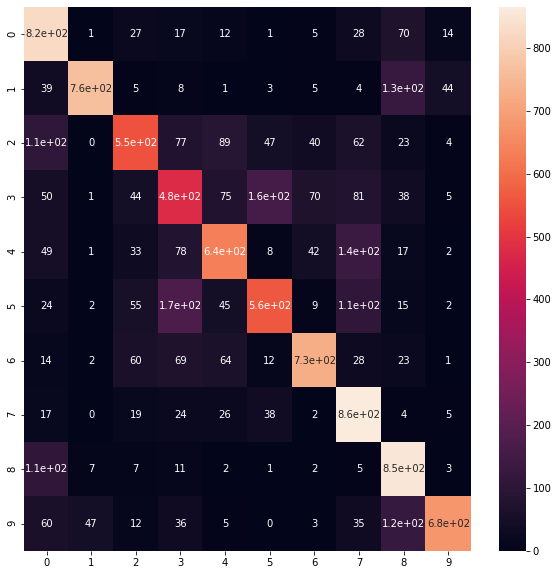

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
n = 8 
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

(8, 32, 32, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


ImportError: ignored

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

# GREAT JOB! 